In [2]:
import sys
import os
sys.path.insert(0, os.path.abspath('/home/maldo/projects/virtualenvs/datathon/lib/python3.7/site-packages'))

In [3]:
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *

In [4]:
sys.path.insert(0, os.path.abspath('/home/maldo/projects/datathon'))
from src.models.model import SoilClassifier
from src.constants import *
from src.features.features import get_features, ImbalanceTransformer, ScalerTransformer
from src.experiments.experiments import run_experiment
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
import seaborn as sns
import math

In [5]:
df = pd.read_csv(os.path.join('../data/processed', 'train_data_imbalanced.csv'))
df_test1 = pd.read_csv(os.path.join('../data/processed', 'test_data_balanced.csv'))
df_test2 = pd.read_csv(os.path.join('../data/processed', 'test_data_imbalanced.csv'))

In [6]:
df_estimar = pd.read_csv(os.path.join('../data/raw', ESTIMATE_RAW_DATA_SET), sep='|')

In [7]:
df_estimar

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,Q_NIR_8_0_9,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID
0,44198C2A811A4DF4,2200905624,165480229,1.105847e-06,445.999637,634.001172,780.000568,902.004053,1025.997009,1157.997681,...,2545.997754,6803.875107,283.593030,0.046741,0.014588,0.011298,0.774503,1994,5.0,4
1,216F638609E0E39E,2207436564,165625751,0.000000e+00,385.000995,580.005762,737.004449,873.996460,1005.998779,1141.001758,...,2220.990137,5544.670485,357.712450,0.378483,0.041085,0.025753,0.626835,1968,8.0,3
2,FFFCEFB11E257364,2200313961,165752898,0.000000e+00,343.996613,567.010620,745.995483,900.997925,1051.995361,1200.006226,...,2421.002441,8827.104856,160.979017,0.306545,0.034637,0.054977,1.587207,1968,5.0,7
3,596C5C8CE10BCF,2199220382,166288192,0.000000e+00,173.999956,218.000000,261.999713,315.999951,408.000565,560.000500,...,2752.005786,7734.759269,9088.678448,0.338955,0.006846,0.005448,0.795725,1993,6.0,6
4,F931B9FA2A8641D1,2209143550,165253334,6.931730e-06,588.002014,738.999451,848.001282,954.000244,1074.000183,1228.998291,...,2712.997681,7435.991490,994.424368,0.581476,0.036470,0.016033,0.439638,1964,4.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5613,EEDC412322324F11,2150225841,165784181,2.970924e-11,244.000557,308.999573,358.000412,404.001129,452.999222,505.999176,...,2649.989014,4584.445266,92.647868,0.145280,0.040899,0.038341,0.937447,1971,1.0,5
5614,C3ED06EF07E7B00D,2192030837,165800127,0.000000e+00,325.001498,513.997632,659.003906,794.994531,920.503754,1056.002026,...,2586.998071,6249.828995,152.576523,0.533303,0.030339,0.115207,3.797293,1945,1.0,5
5615,C9625D1602A319E5,2169540519,165519808,1.494801e-06,162.000359,198.000610,245.000572,329.001068,493.999451,700.002563,...,2871.995728,6006.857875,97.198486,0.550830,0.064267,0.088180,1.372074,1999,1.0,4
5616,3A42595E9285B866,2225905882,165629885,0.000000e+00,316.997635,503.003845,655.999390,798.997314,941.999359,1097.001221,...,2347.998413,5448.082132,154.021555,0.486815,0.052910,0.059737,1.129032,1964,4.0,6


In [8]:
classifier1 = SoilClassifier()

classifier1.load('../src/experiments/results/balanced_6_gradient_boosting_500_5000_scaled.pkl')

classifier1.evaluate(df_test1, df_test1[TARGET_FEATURE])

classifier1.metrics

{'test': {'accuracy': 0.5923270683975974,
  'balanced_accuracy': 0.5225523449051976,
  'precision_macro': 0.6131835758187263,
  'precision_weighted': 0.5987411466429484,
  'recall_macro': 0.5225523449051976,
  'recall_weighted': 0.5923270683975974,
  'f1_macro': 0.5335994213145311,
  'f1_weighted': 0.5647290430635726}}

In [9]:
predictions_1 =  classifier1.predict(df_estimar.copy())

In [12]:
classifier2 = SoilClassifier()

classifier2.load('../src/experiments/results/imbalanced_1_gradient_boosting_500_9000_scaled.pkl')

classifier2.evaluate(df_test2,df_test2[TARGET_FEATURE])

classifier2.metrics

{'test': {'accuracy': 0.8538215634989829,
  'balanced_accuracy': 0.48565467612776014,
  'precision_macro': 0.4749710635254955,
  'precision_weighted': 0.8752377128367731,
  'recall_macro': 0.48565467612776014,
  'recall_weighted': 0.8538215634989829,
  'f1_macro': 0.46292777816764563,
  'f1_weighted': 0.861209403477862}}

In [10]:
predictions_2 =  classifier2.predict(df_estimar.copy())

In [11]:
df_estimar['CLASE1'] = predictions_1
df_estimar['CLASE2'] = predictions_2


In [13]:
df_estimar[['ID','CLASE1']].head()

,ID,CLASE1
0,44198C2A811A4DF4,PUBLIC
1,216F638609E0E39E,RESIDENTIAL
2,FFFCEFB11E257364,RESIDENTIAL
3,596C5C8CE10BCF,OFFICE
4,F931B9FA2A8641D1,OTHER


In [14]:
df_estimar[['ID','CLASE2']].head()

,ID,CLASE2
0,44198C2A811A4DF4,PUBLIC
1,216F638609E0E39E,RESIDENTIAL
2,FFFCEFB11E257364,RESIDENTIAL
3,596C5C8CE10BCF,OFFICE
4,F931B9FA2A8641D1,INDUSTRIAL


In [12]:
df_estimar.CLASE1.value_counts()

RESIDENTIAL    3002
INDUSTRIAL     1090
PUBLIC          759
OFFICE          332
OTHER           213
RETAIL          119
AGRICULTURE     103
Name: CLASE1, dtype: int64

In [13]:
df_estimar.CLASE2.value_counts()

RESIDENTIAL    3266
INDUSTRIAL     1015
PUBLIC          686
OFFICE          270
OTHER           178
RETAIL          106
AGRICULTURE      97
Name: CLASE2, dtype: int64

In [15]:
df_estimar.head()

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE1,CLASE2
0,44198C2A811A4DF4,2200905624,165480229,0.000001,445.999637,634.001172,780.000568,902.004053,1025.997009,1157.997681,...,283.593030,0.046741,0.014588,0.011298,0.774503,1994,5.0,4,PUBLIC,PUBLIC
1,216F638609E0E39E,2207436564,165625751,0.000000,385.000995,580.005762,737.004449,873.996460,1005.998779,1141.001758,...,357.712450,0.378483,0.041085,0.025753,0.626835,1968,8.0,3,RESIDENTIAL,RESIDENTIAL
2,FFFCEFB11E257364,2200313961,165752898,0.000000,343.996613,567.010620,745.995483,900.997925,1051.995361,1200.006226,...,160.979017,0.306545,0.034637,0.054977,1.587207,1968,5.0,7,RESIDENTIAL,RESIDENTIAL
3,596C5C8CE10BCF,2199220382,166288192,0.000000,173.999956,218.000000,261.999713,315.999951,408.000565,560.000500,...,9088.678448,0.338955,0.006846,0.005448,0.795725,1993,6.0,6,OFFICE,OFFICE
4,F931B9FA2A8641D1,2209143550,165253334,0.000007,588.002014,738.999451,848.001282,954.000244,1074.000183,1228.998291,...,994.424368,0.581476,0.036470,0.016033,0.439638,1964,4.0,7,OTHER,INDUSTRIAL


In [14]:
classifier = SoilClassifier()

In [17]:
classifier.fit(df, df[TARGET_FEATURE])

execute _fit_resample


/home/maldo/projects/virtualenvs/datathon/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
classifier.dump('../src/experiments/test.pkl')

In [19]:
classifier.evaluate(df_test, df_test[TARGET_FEATURE])

/home/maldo/projects/virtualenvs/datathon/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
classifier.metrics

{'train': {'accuracy': 0.9042204978127645,
  'balanced_accuracy': 0.14285714285714285,
  'precision_macro': 0.12917435683039494,
  'precision_weighted': 0.8176147086647637,
  'recall_macro': 0.14285714285714285,
  'recall_weighted': 0.9042204978127645,
  'f1_macro': 0.13567163779485394,
  'f1_weighted': 0.8587395310615514},
 'test': {'accuracy': 0.2900600658787057,
  'balanced_accuracy': 0.14285714285714285,
  'precision_macro': 0.041437152268386526,
  'precision_weighted': 0.08413484181755909,
  'recall_macro': 0.14285714285714285,
  'recall_weighted': 0.2900600658787057,
  'f1_macro': 0.0642406557095653,
  'f1_weighted': 0.13043554179045433}}

In [10]:
classifier2 = SoilClassifier()

In [11]:
classifier2.load('../src/experiments/test.pkl')

In [14]:
    classifier2.predict(df_test) == classifier.predict(df_test)

array([ True,  True,  True, ...,  True,  True,  True])

In [9]:
transformed = transformer.transform(df)

NameError: name 'transformer' is not defined

In [19]:
transformed = pd.DataFrame(transformed, columns= transformer.get_feature_names())

In [23]:
df.loc[0:1,]

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
0,817D0B449AA4CE4A,2206943551,165769382,0.0,343.996613,567.01062,745.995483,900.997925,1051.995361,1200.006226,...,8827.104856,335.653455,0.524115,0.035211,0.044346,1.259424,2000,4.0,4,RESIDENTIAL
1,A1D3A28A92B9E2F7,2228324900,165646790,0.0,388.001147,584.00437,743.997858,891.000598,1042.505188,1201.999268,...,10952.938615,67.193238,0.394104,0.090090,0.065104,0.722656,1996,3.0,7,RESIDENTIAL


In [25]:
transformed.loc[0:1,:]

,not_transformed__X,not_transformed__Y,not_transformed__Q_R_4_0_0,not_transformed__Q_R_4_0_1,not_transformed__Q_R_4_0_2,not_transformed__Q_R_4_0_3,not_transformed__Q_R_4_0_4,not_transformed__Q_R_4_0_5,not_transformed__Q_R_4_0_6,not_transformed__Q_R_4_0_7,...,log_area__log_AREA,building_year_decades__CONTRUCTIONYEAR_1950,building_year_decades__CONTRUCTIONYEAR_1960,building_year_decades__CONTRUCTIONYEAR_1970,building_year_decades__CONTRUCTIONYEAR_1980,building_year_decades__CONTRUCTIONYEAR_1990,building_year_decades__CONTRUCTIONYEAR_2000,building_year_decades__CONTRUCTIONYEAR_<1950,building_year_decades__CONTRUCTIONYEAR_>=2010,building_antiquity_log__log_CONTRUCTIONYEAR_antiquity
0,2.206944e+09,165769382.0,0.0,343.996613,567.01062,745.995483,900.997925,1051.995361,1200.006226,1370.990234,...,5.819054,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.044522
1,2.228325e+09,165646790.0,0.0,388.001147,584.00437,743.997858,891.000598,1042.505188,1201.999268,1378.998694,...,4.222345,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.218876


In [30]:
math.log(67.193238+1)

4.222345410373657

In [12]:
len(transformer.get_feature_names())

76

In [21]:
df.shape

(98069, 56)

In [10]:
df.columns

Index(['ID', 'X', 'Y', 'Q_R_4_0_0', 'Q_R_4_0_1', 'Q_R_4_0_2', 'Q_R_4_0_3',
       'Q_R_4_0_4', 'Q_R_4_0_5', 'Q_R_4_0_6', 'Q_R_4_0_7', 'Q_R_4_0_8',
       'Q_R_4_0_9', 'Q_R_4_1_0', 'Q_G_3_0_0', 'Q_G_3_0_1', 'Q_G_3_0_2',
       'Q_G_3_0_3', 'Q_G_3_0_4', 'Q_G_3_0_5', 'Q_G_3_0_6', 'Q_G_3_0_7',
       'Q_G_3_0_8', 'Q_G_3_0_9', 'Q_G_3_1_0', 'Q_B_2_0_0', 'Q_B_2_0_1',
       'Q_B_2_0_2', 'Q_B_2_0_3', 'Q_B_2_0_4', 'Q_B_2_0_5', 'Q_B_2_0_6',
       'Q_B_2_0_7', 'Q_B_2_0_8', 'Q_B_2_0_9', 'Q_B_2_1_0', 'Q_NIR_8_0_0',
       'Q_NIR_8_0_1', 'Q_NIR_8_0_2', 'Q_NIR_8_0_3', 'Q_NIR_8_0_4',
       'Q_NIR_8_0_5', 'Q_NIR_8_0_6', 'Q_NIR_8_0_7', 'Q_NIR_8_0_8',
       'Q_NIR_8_0_9', 'Q_NIR_8_1_0', 'AREA', 'GEOM_R1', 'GEOM_R2', 'GEOM_R3',
       'GEOM_R4', 'CONTRUCTIONYEAR', 'MAXBUILDINGFLOOR', 'CADASTRALQUALITYID',
       'CLASE'],
      dtype='object')

In [13]:
pd.DataFrame(transformed, columns = transformer.get_feature_names())

['1950' '1960' '1970' '1980' '1990' '2000' '2010' '<1950']


TypeError: '(55503, slice(None, None, None))' is an invalid key

In [11]:
df.shape

(98069, 56)

In [14]:
    df.CONTRUCTIONYEAR.max()

2017

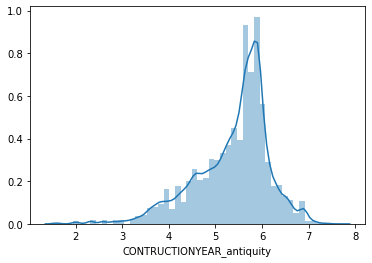

In [12]:
sns.distplot(transformed.CONTRUCTIONYEAR_antiquity.apply(lambda x: math.log(x,2)))

In [25]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
transformer = OrdinalEncoder(categories=[CADASTRAL_QUALITY_ORDER])

In [26]:
transformer.fit(df[['CADASTRALQUALITYID']].dropna())

OrdinalEncoder(categories=[[nan, '9', '8', '7', '6', '5', '4', '3', '2', '1',
                            'C', 'B', 'A']],
               dtype=<class 'numpy.float64'>)

In [27]:
transformer.transform(df[['CADASTRALQUALITYID']].dropna())

array([[6.],
       [3.],
       [5.],
       ...,
       [1.],
       [4.],
       [4.]])

In [44]:
def get_element_index(element, args):
    if element and element in args:
        return args.index(element)
    else:
        return -1

In [50]:
transformed_df = pd.DataFrame()
key = 'CADASTRALQUALITYID'

In [52]:
transformed_df['{}_ordinal'.format(key)] = df[key].apply(get_element_index, args=[CADASTRAL_QUALITY_ORDER])

In [59]:
transformed_df.loc[df[key].isna()]

,CADASTRALQUALITYID_ordinal
4357,-1
11183,-1
12917,-1
13922,-1
20871,-1
26123,-1
43443,-1
49532,-1
58449,-1
59143,-1


In [11]:
df.columns

Index(['ID', 'X', 'Y', 'Q_R_4_0_0', 'Q_R_4_0_1', 'Q_R_4_0_2', 'Q_R_4_0_3',
       'Q_R_4_0_4', 'Q_R_4_0_5', 'Q_R_4_0_6', 'Q_R_4_0_7', 'Q_R_4_0_8',
       'Q_R_4_0_9', 'Q_R_4_1_0', 'Q_G_3_0_0', 'Q_G_3_0_1', 'Q_G_3_0_2',
       'Q_G_3_0_3', 'Q_G_3_0_4', 'Q_G_3_0_5', 'Q_G_3_0_6', 'Q_G_3_0_7',
       'Q_G_3_0_8', 'Q_G_3_0_9', 'Q_G_3_1_0', 'Q_B_2_0_0', 'Q_B_2_0_1',
       'Q_B_2_0_2', 'Q_B_2_0_3', 'Q_B_2_0_4', 'Q_B_2_0_5', 'Q_B_2_0_6',
       'Q_B_2_0_7', 'Q_B_2_0_8', 'Q_B_2_0_9', 'Q_B_2_1_0', 'Q_NIR_8_0_0',
       'Q_NIR_8_0_1', 'Q_NIR_8_0_2', 'Q_NIR_8_0_3', 'Q_NIR_8_0_4',
       'Q_NIR_8_0_5', 'Q_NIR_8_0_6', 'Q_NIR_8_0_7', 'Q_NIR_8_0_8',
       'Q_NIR_8_0_9', 'Q_NIR_8_1_0', 'AREA', 'GEOM_R1', 'GEOM_R2', 'GEOM_R3',
       'GEOM_R4', 'CONTRUCTIONYEAR', 'MAXBUILDINGFLOOR', 'CADASTRALQUALITYID',
       'CLASE'],
      dtype='object')

In [29]:
from sklearn.pipeline import Pipeline
from src.features.features import BuildingYearDecadesTransformer
from sklearn.preprocessing import OneHotEncoder

pipeline = Pipeline([
    ('decades', BuildingYearDecadesTransformer(['CONTRUCTIONYEAR'], [list(range(1950, 2020, 10))])),
    ('onehot', OneHotEncoder(sparse=False))
])

In [30]:
pipeline.fit(df)

Pipeline(memory=None,
         steps=[('decades',
                 BuildingYearDecadesTransformer(decades_groups=[[1950, 1960,
                                                                 1970, 1980,
                                                                 1990, 2000,
                                                                 2010]],
                                                keys=['CONTRUCTIONYEAR'])),
                ('onehot',
                 OneHotEncoder(categorical_features=None, categories=None,
                               drop=None, dtype=<class 'numpy.float64'>,
                               handle_unknown='error', n_values=None,
                               sparse=False))],
         verbose=False)

In [31]:
pipeline.transform(df)[0]

array([0., 0., 0., 0., 0., 1., 0., 0.])

In [32]:
pipeline.named_steps['onehot'].get_feature_names()

array(['x0_1950', 'x0_1960', 'x0_1970', 'x0_1980', 'x0_1990', 'x0_2000',
       'x0_2010', 'x0_<1950'], dtype=object)

In [17]:
df.iloc[0].CONTRUCTIONYEAR

2000

In [18]:
byt = BuildingYearDecadesTransformer(['CONTRUCTIONYEAR'], [list(range(1950, 2020, 10))])

In [19]:
byt.fit(df)

BuildingYearDecadesTransformer(decades_groups=[[1950, 1960, 1970, 1980, 1990,
                                                2000, 2010]],
                               keys=['CONTRUCTIONYEAR'])

In [20]:
byt.transform(df)

,CONTRUCTIONYEAR_decades
0,2000
1,1990
2,1990
3,2000
4,2000
5,1950
6,1970
7,<1950
8,1950
9,1990


In [15]:
from src.features.features import BuildingYearDecadesTransformer

test = BuildingYearDecadesTransformer(['MAXBUILDINGFLOOR'], [list(range(0,11))])

In [16]:
test.fit(df)

BuildingYearDecadesTransformer(decades_groups=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                10]],
                               keys=['MAXBUILDINGFLOOR'])

In [17]:
test.transform(df)

,MAXBUILDINGFLOOR_decades
0,4
1,3
2,8
3,10
4,1
5,1
6,3
7,7
8,5
9,1


In [147]:
min_val = 10
max_val = 30
test_val = 79

In [148]:
min(max(min_val, test_val), max_val)

30